In [2]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Variabel input: Luas Lahan (hektar), Produksi Padi (ton/hektar), dan Irigasi
luas_lahan = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'luas_lahan')
produksi_padi = ctrl.Antecedent(np.arange(0, 9.1, 0.1), 'produksi_padi')
irigasi = ctrl.Antecedent(np.arange(0, 18.1, 0.1), 'irigasi')  # Variabel input irigasi
subsidi = ctrl.Consequent(np.arange(0, 12.1, 0.1), 'subsidi')

In [117]:
# Fungsi keanggotaan untuk Luas Lahan
luas_lahan['kecil'] = fuzz.trimf(luas_lahan.universe, [0, 1, 2])
luas_lahan['sedikit_sedang'] = fuzz.trimf(luas_lahan.universe, [1, 2, 3])
luas_lahan['sedang'] = fuzz.trimf(luas_lahan.universe, [2, 3, 4])
luas_lahan['sedikit_tinggi'] = fuzz.trimf(luas_lahan.universe, [3, 4, 5])
luas_lahan['tinggi'] = fuzz.trimf(luas_lahan.universe, [4, 5, 6])

# Fungsi keanggotaan untuk Produksi Padi (dibuat lebih sejajar dengan Luas Lahan)
produksi_padi['kecil'] = fuzz.trimf(produksi_padi.universe, [0, 1.5, 3])
produksi_padi['sedikit_sedang'] = fuzz.trimf(produksi_padi.universe, [1.5, 3, 4.5])
produksi_padi['sedang'] = fuzz.trimf(produksi_padi.universe, [3, 4.5, 6])
produksi_padi['sedikit_tinggi'] = fuzz.trimf(produksi_padi.universe, [4.5, 6, 7.5])
produksi_padi['tinggi'] = fuzz.trimf(produksi_padi.universe, [6, 7.5, 9])

# Fungsi keanggotaan untuk Irigasi (ditata agar mirip dengan pola Luas Lahan)
irigasi['kecil'] = fuzz.trimf(irigasi.universe, [0, 3, 6])
irigasi['sedikit_sedang'] = fuzz.trimf(irigasi.universe, [3, 6, 9])
irigasi['sedang'] = fuzz.trimf(irigasi.universe, [6, 9, 12])
irigasi['sedikit_tinggi'] = fuzz.trimf(irigasi.universe, [9, 12, 15])
irigasi['tinggi'] = fuzz.trimf(irigasi.universe, [12, 15, 18])

# Fungsi keanggotaan untuk Subsidi
subsidi['kecil'] = fuzz.trimf(subsidi.universe, [0, 2, 4])
subsidi['sedikit_sedang'] = fuzz.trimf(subsidi.universe, [2, 4, 6])
subsidi['sedang'] = fuzz.trimf(subsidi.universe, [4, 6, 8])
subsidi['sedikit_tinggi'] = fuzz.trimf(subsidi.universe, [6, 8, 10])
subsidi['tinggi'] = fuzz.trimf(subsidi.universe, [8, 10, 12])

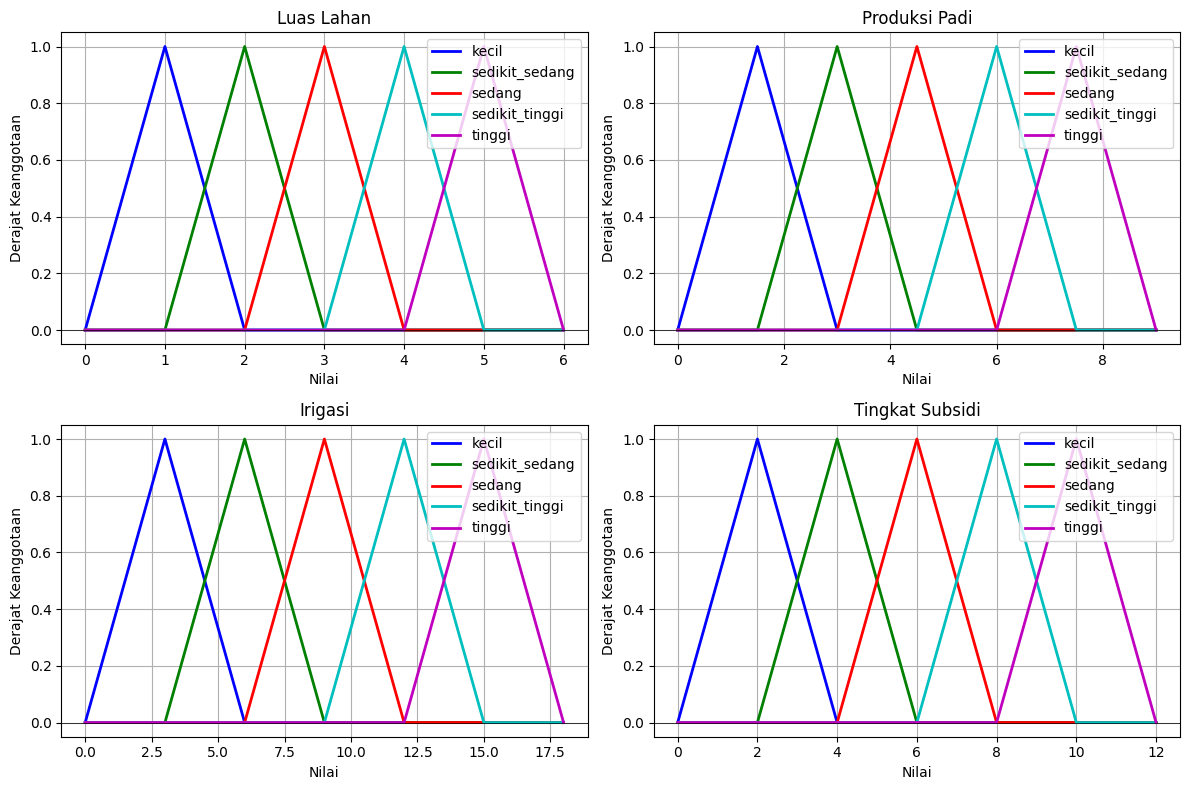

In [118]:
# Membuat subplot 2x2 untuk visualisasi lebih rapi
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Fungsi untuk menampilkan grafik keanggotaan
def plot_membership(var, title, ax):
    colors = ['b', 'g', 'r', 'c', 'm']  # Warna untuk setiap kategori
    for i, (term, mf) in enumerate(var.terms.items()):
        ax.plot(var.universe, mf.mf, label=term, color=colors[i % len(colors)], linewidth=2)
    ax.set_title(title)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Derajat Keanggotaan')
    ax.axhline(y=0, color='black', linewidth=0.5)  # Garis sumbu y
    ax.legend()
    ax.grid()

# Menampilkan semua grafik ke subplot
plot_membership(luas_lahan, 'Luas Lahan', axes[0])
plot_membership(produksi_padi, 'Produksi Padi', axes[1])
plot_membership(irigasi, 'Irigasi', axes[2])
plot_membership(subsidi, 'Tingkat Subsidi', axes[3])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [88]:
rules = [
    ctrl.Rule(luas_lahan['kecil'] & produksi_padi['kecil'] & irigasi['kecil'], subsidi['tinggi']),
    ctrl.Rule(luas_lahan['kecil'] & produksi_padi['kecil'] & irigasi['sedikit_sedang'], subsidi['tinggi']),
    ctrl.Rule(luas_lahan['kecil'] & produksi_padi['sedikit_sedang'] & irigasi['kecil'], subsidi['tinggi']),
    ctrl.Rule(luas_lahan['kecil'] & produksi_padi['sedikit_sedang'] & irigasi['sedikit_sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['kecil'] & produksi_padi['sedang'] & irigasi['kecil'], subsidi['sedang']),
    
    ctrl.Rule(luas_lahan['sedikit_sedang'] & produksi_padi['kecil'] & irigasi['kecil'], subsidi['tinggi']),
    ctrl.Rule(luas_lahan['sedikit_sedang'] & produksi_padi['sedikit_sedang'] & irigasi['kecil'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedikit_sedang'] & produksi_padi['sedang'] & irigasi['sedikit_sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedikit_sedang'] & produksi_padi['sedikit_tinggi'] & irigasi['kecil'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedikit_sedang'] & produksi_padi['tinggi'] & irigasi['sedikit_sedang'], subsidi['kecil']),
    
    ctrl.Rule(luas_lahan['sedang'] & produksi_padi['kecil'] & irigasi['sedikit_sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedang'] & produksi_padi['sedikit_sedang'] & irigasi['sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedang'] & produksi_padi['sedang'] & irigasi['sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedang'] & produksi_padi['sedikit_tinggi'] & irigasi['sedang'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['sedang'] & produksi_padi['tinggi'] & irigasi['sedikit_tinggi'], subsidi['kecil']),
    
    ctrl.Rule(luas_lahan['sedikit_tinggi'] & produksi_padi['kecil'] & irigasi['sedang'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedikit_tinggi'] & produksi_padi['sedikit_sedang'] & irigasi['sedikit_tinggi'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['sedikit_tinggi'] & produksi_padi['sedang'] & irigasi['tinggi'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['sedikit_tinggi'] & produksi_padi['sedikit_tinggi'] & irigasi['tinggi'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['sedikit_tinggi'] & produksi_padi['tinggi'] & irigasi['tinggi'], subsidi['kecil']),
    
    ctrl.Rule(luas_lahan['tinggi'] & produksi_padi['kecil'] & irigasi['sedikit_tinggi'], subsidi['sedang']),
    ctrl.Rule(luas_lahan['tinggi'] & produksi_padi['sedikit_sedang'] & irigasi['tinggi'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['tinggi'] & produksi_padi['sedang'] & irigasi['tinggi'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['tinggi'] & produksi_padi['sedikit_tinggi'] & irigasi['tinggi'], subsidi['kecil']),
    ctrl.Rule(luas_lahan['tinggi'] & produksi_padi['tinggi'] & irigasi['tinggi'], subsidi['kecil']),
]

In [ ]:
# Definisikan sistem kontrol fuzzy
subsidi_ctrl = ctrl.ControlSystem(rules)
subsidi_simulasi = ctrl.ControlSystemSimulation(subsidi_ctrl)

# === Studi Kasus 1 ===
luas_input_1 = 1.5  # Luas Lahan 1,5 hektar
produksi_input_1 = 2  # Produksi Padi 2 ton/hektar
irigasi_input_1 = 3.5  # Irigasi 3,5 (misalnya dalam skala 1-5)

# Input ke sistem fuzzy
subsidi_simulasi.input['luas_lahan'] = luas_input_1
subsidi_simulasi.input['produksi_padi'] = produksi_input_1
subsidi_simulasi.input['irigasi'] = irigasi_input_1

# Hitung hasil
subsidi_simulasi.compute()

# Data α dan Z untuk Studi Kasus 1 (lebih presisi)
alpha_values_1 = np.array([2.18, 0.71, 1.40, 0.59, 2.18, 1.18], dtype=np.float64)
z_values_1 = np.array([4.47, 4.31, 4.31, 3.64, 4.47, 3.64], dtype=np.float64)

# Perhitungan defuzzifikasi
manual_defuzz_1 = np.sum(alpha_values_1 * z_values_1) / np.sum(alpha_values_1)

# === Studi Kasus 2 ===
luas_input_2 = 4.5  # Luas Lahan 4,5 hektar
produksi_input_2 = 6.5  # Produksi Padi 6,5 ton/hektar
irigasi_input_2 = 14  # Irigasi 14

# Input ke sistem fuzzy
subsidi_simulasi.input['luas_lahan'] = luas_input_2
subsidi_simulasi.input['produksi_padi'] = produksi_input_2
subsidi_simulasi.input['irigasi'] = irigasi_input_2

# Hitung hasil
subsidi_simulasi.compute()

# Data α dan Z untuk Studi Kasus 2
alpha_values_2 = np.array([0.945, 0.725], dtype=np.float64)
z_values_2 = np.array([2.015, 2.285], dtype=np.float64) 

# Perhitungan defuzzifikasi
manual_defuzz_2 = np.sum(alpha_values_2 * z_values_2) / np.sum(alpha_values_2)

# Cetak Hasil
print(f'=== HASIL FUZZY TSUKAMOTO ===')
print(f'🔹 Studi Kasus 1')
print(f'   Luas Lahan       : {luas_input_1} hektar')
print(f'   Produksi Padi    : {produksi_input_1} ton/hektar')
print(f'   Irigasi          : {irigasi_input_1}')
print(f'   Nilai Subsidi    : {round(manual_defuzz_1, 2)} juta rupiah per hektar')

print(f'\n🔹 Studi Kasus 2')
print(f'   Luas Lahan       : {luas_input_2} hektar')
print(f'   Produksi Padi    : {produksi_input_2} ton/hektar')
print(f'   Irigasi          : {irigasi_input_2}')
print(f'   Nilai Subsidi    : {round(manual_defuzz_2, 2)} juta rupiah per hektar')

=== HASIL FUZZY TSUKAMOTO ===
🔹 Studi Kasus 1
   Luas Lahan       : 1.5 hektar
   Produksi Padi    : 2 ton/hektar
   Irigasi          : 3.5
   Nilai Subsidi    : 4.25 juta rupiah per hektar

🔹 Studi Kasus 2
   Luas Lahan       : 4.5 hektar
   Produksi Padi    : 6.5 ton/hektar
   Irigasi          : 14
   Nilai Subsidi    : 2.13 juta rupiah per hektar
